In [ ]:
# Basic libraries
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Display options
pd.set_option("display.max_columns", None)

In [2]:
df = pd.read_csv("nasa_disaster_dataset.csv")

# Quick look
df.head()

,Unnamed: 0,id,country,geolocation,level,adm1,location,disastertype,continent
0,0,109,Albania,Ana E Malit,3,Shkoder,Ana E Malit,flood,Europe
1,1,109,Albania,Bushat,3,Shkoder,Bushat,flood,Europe
2,2,175,Angola,Onjiva,3,Cunene,Onjiva,flood,Africa
3,3,187,Angola,Evale,3,Cunene,Evale,flood,Africa
4,4,187,Angola,Mupa,3,Cunene,Mupa,flood,Africa


In [3]:
df.info()
df.describe(include="all")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39953 entries, 0 to 39952
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    39953 non-null  int64 
 1   id            39953 non-null  object
 2   country       39953 non-null  object
 3   geolocation   39953 non-null  object
 4   level         39953 non-null  int64 
 5   adm1          39953 non-null  object
 6   location      39953 non-null  object
 7   disastertype  39953 non-null  object
 8   continent     39953 non-null  object
dtypes: int64(2), object(7)
memory usage: 2.7+ MB


,Unnamed: 0,id,country,geolocation,level,adm1,location,disastertype,continent
count,39953.000000,39953,39953,39953,39953.000000,39953,39953,39953,39953
unique,NaN,9924,200,9874,NaN,2931,19573,8,7
top,NaN,05-407,United States,Texas,NaN,Texas,Honshu,flood,Asia
freq,NaN,252,3819,161,NaN,330,245,17347,17671
mean,19976.000000,NaN,NaN,NaN,1.410107,NaN,NaN,NaN,NaN
std,11533.581989,NaN,NaN,NaN,0.601680,NaN,NaN,NaN,NaN
min,0.000000,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN
25%,9988.000000,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN
50%,19976.000000,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN
75%,29964.000000,NaN,NaN,NaN,2.000000,NaN,NaN,NaN,NaN


In [4]:
# Missing values
df.isnull().sum()

# Drop duplicates
df.drop_duplicates(inplace=True)

# Standardize categorical columns (lowercase, strip spaces)
df["country"] = df["country"].str.strip().str.title()
df["disastertype"] = df["disastertype"].str.strip().str.title()
df["continent"] = df["continent"].str.strip().str.title()

C:\Users\chana\AppData\Local\Temp\ipykernel_22456\369378717.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_cities.values, y=top_cities.index, palette="viridis")


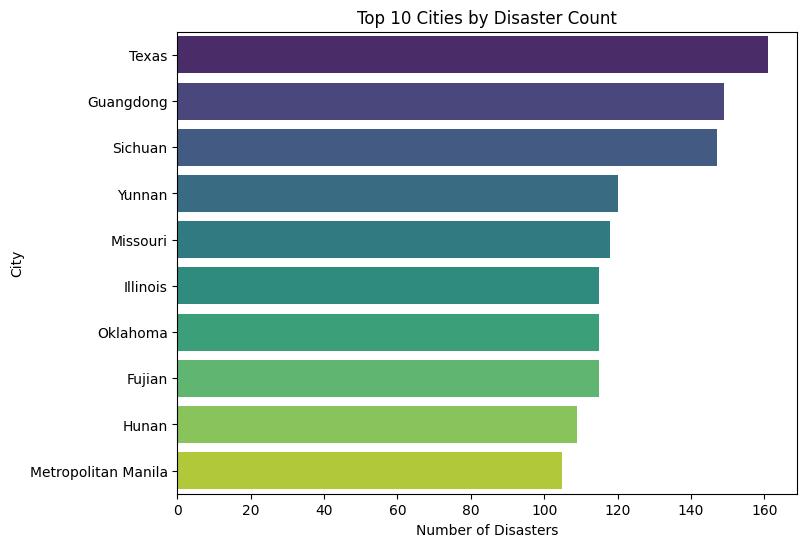

In [5]:
# Top 10 cities with most disasters
top_cities = df["geolocation"].value_counts().head(10)

plt.figure(figsize=(8,6))
sns.barplot(x=top_cities.values, y=top_cities.index, palette="viridis")
plt.title("Top 10 Cities by Disaster Count")
plt.xlabel("Number of Disasters")
plt.ylabel("City")
plt.show()

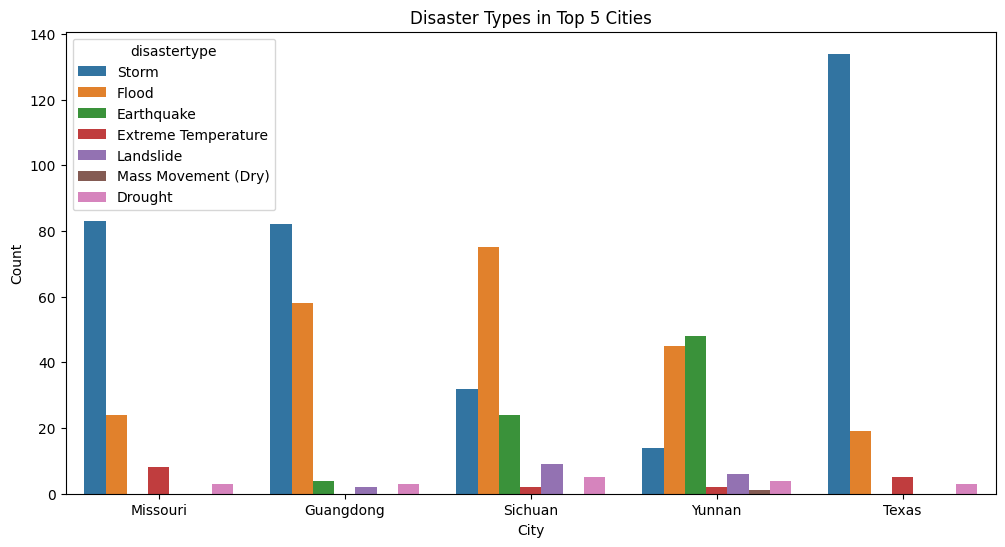

In [6]:
# Disaster type frequency by top 5 cities
top5_cities = df["geolocation"].value_counts().head(5).index
city_disasters = df[df["geolocation"].isin(top5_cities)]

plt.figure(figsize=(12,6))
sns.countplot(data=city_disasters, x="geolocation", hue="disastertype")
plt.title("Disaster Types in Top 5 Cities")
plt.xlabel("City")
plt.ylabel("Count")
plt.show()

C:\Users\chana\AppData\Local\Temp\ipykernel_22456\17644020.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_severity_city.values, y=avg_severity_city.index, palette="magma")


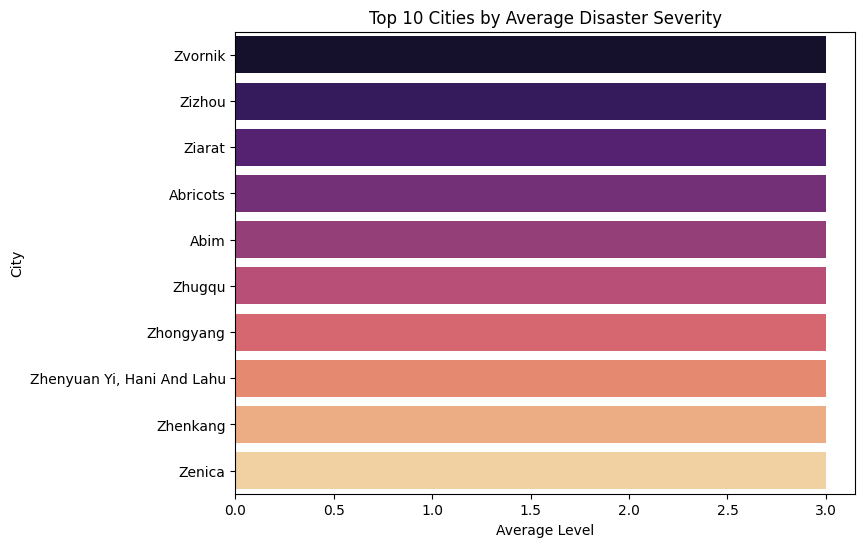

In [7]:
# Average severity (level) per city
avg_severity_city = df.groupby("geolocation")["level"].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(8,6))
sns.barplot(x=avg_severity_city.values, y=avg_severity_city.index, palette="magma")
plt.title("Top 10 Cities by Average Disaster Severity")
plt.xlabel("Average Level")
plt.ylabel("City")
plt.show()

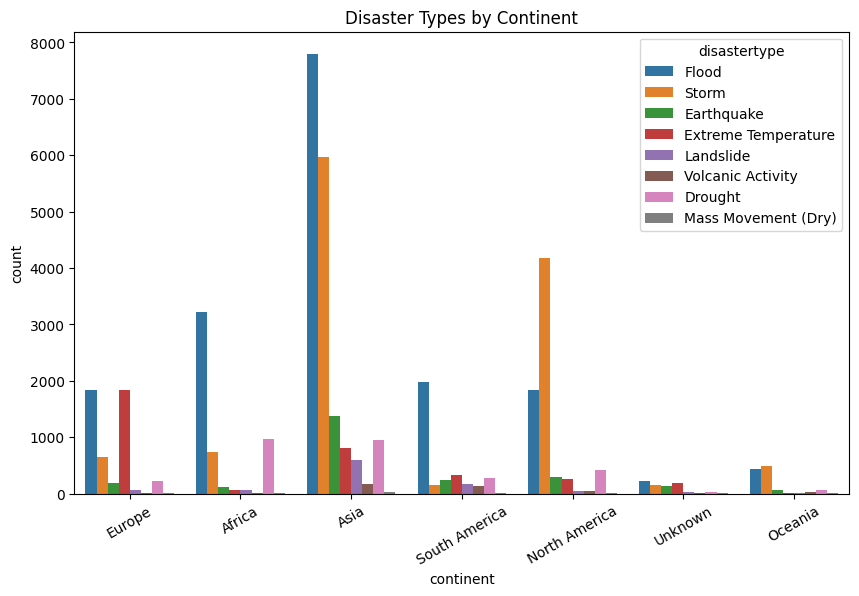

In [8]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x="continent", hue="disastertype")
plt.title("Disaster Types by Continent")
plt.xticks(rotation=30)
plt.show()